In [1]:
from __future__ import print_function

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")

Packages Loaded


In [2]:
# Lets import our MNIST data like we did in lab 3.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train: x_train=%s, y_train=%s' % (x_train.shape, y_train.shape))
print('Test: x_test=%s, y_test=%s' % (x_test.shape, y_test.shape))


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Train: x_train=(60000, 28, 28), y_train=(60000,)
Test: x_test=(10000, 28, 28), y_test=(10000,)


In [3]:
# Now import Cifar-10 data and process it.
(train, train_target), (test, test_target) = cifar10.load_data()

#Taking a look at the raw data
print('Train: X=%s, y=%s' % (train.shape, train_target.shape))
print('Test: X=%s, y=%s' % (test.shape, test_target.shape))

#for i in range(9):
    # define subplot
    #plt.subplot(330 + 1 + i)
    # plot raw pixel data
    #plt.imshow(train[i])

#plt.show()



#adjust data to type int and normalize between 0-1 
train = train.reshape(50000, 3072)
test = test.reshape(10000, 3072)
train = train.astype('float32')
test = test.astype('float32')
train /=  255.0
test /= 255.0

train_target = tf.keras.utils.to_categorical(train_target, 10)
test_target= tf.keras.utils.to_categorical(test_target, 10)

#Look at data after reshaping
print('Train: X=%s, y=%s' % (train.shape, train_target.shape))
print('Test: X=%s, y=%s' % (test.shape, test_target.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Train: X=(50000, 3072), y=(50000, 10)
Test: X=(10000, 3072), y=(10000, 10)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/

Text(0.5, 1.0, 'MINST accuracy vs val_accuracy (Sequantial baseline model)')

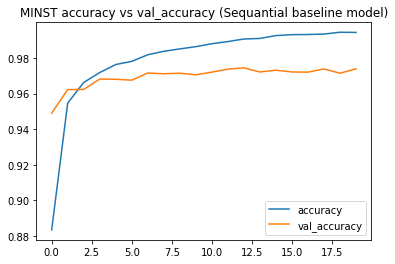

In [9]:
# Our baseline model for this lab.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('MINST accuracy vs val_accuracy (Sequantial baseline model)')

### Now convert this baseline into a Functional Model using keras' Functional Model API.
https://keras.io/getting-started/functional-api-guide/

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_______________________________________________________

Text(0.5, 1.0, 'MINST accuracy vs val_accuracy (Functional baseline model)')

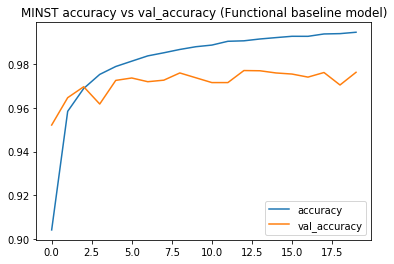

In [13]:
# Create the functional Baseline here.

#returns a tensor (treat any model as a layer by calling it a tensor)
inputs = Input(shape=(784,))

#layer instance callable on a tensor, returns a tensor
output_1 = Dense(64, activation = 'relu')(inputs)
output_2 = Dense(64, activation = 'relu')(output_1)
output_3 = Dense(64, activation = 'relu')(output_2)
output_4 = Dense(64, activation = 'relu')(output_3)
predictions = Dense(10, activation = 'softmax')(output_4)

#create model that includes the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('MINST accuracy vs val_accuracy (Functional baseline model)')


### Now we are going to compare our baseline to a shallow ResNet that we talked about in class. 
Pay attention to the changes we have made so far including optimizers, batch size, layer neuron width, and dropout.
Why did we make these changes? 

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_46 (Dense)                (None, 128)          100480      img[0][0]                        
__________________________________________________________________________________________________
dense_47 (Dense)                (None, 128)          16512       dense_46[0][0]                   
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 128)          16512       dense_47[0][0]                   
_____________________________________________________________________________________________

Text(0.5, 1.0, 'MINST accuracy vs val_accuracy (ResNet)')

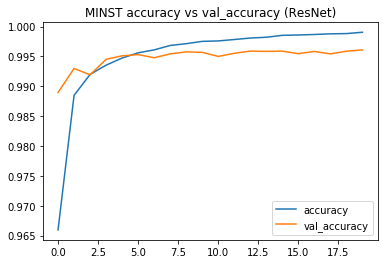

In [15]:
inputs = tf.keras.Input(shape=(784,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = Dense(128)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(128)(block_3_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = Dense(128, activation='relu')(block_4_output)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')
model.summary()

model.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('MINST accuracy vs val_accuracy (ResNet)')


### Now lets make a deeper ResNet. Make A network with 10 Residual Blocks. 
How does this affect training speed, accuracy, and stability?

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_56 (Dense)                (None, 128)          100480      img[0][0]                        
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 128)          16512       dense_56[0][0]                   
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 128)          16512       dense_57[0][0]                   
_____________________________________________________________________________________________

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 487us/sample - loss: 0.1637 - accuracy: 0.9497 - val_loss: 0.0424 - val_accuracy: 0.9862
Epoch 2/20
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0296 - val_accuracy: 0.9904
Epoch 3/20
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0233 - val_accuracy: 0.9928
Epoch 4/20
60000/60000 [==============================] - 18s 297us/sample - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0218 - val_accuracy: 0.9934
Epoch 5/20
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0200 - val_accuracy: 0.9940
Epoch 6/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0181 - val_accuracy: 0.9945
Epoch 7/20
60000/60000 [====================

Text(0.5, 1.0, 'MINST accuracy vs val_accuracy (deep ResNet)')

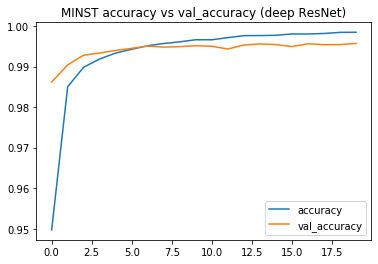

In [16]:
# Create the deep ResNet here.

inputs = tf.keras.Input(shape=(784,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = Dense(128)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(128)(block_3_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = Dense(128)(block_4_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_5_output = tf.keras.layers.add([x, block_4_output])

x = Dense(128)(block_5_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_6_output = tf.keras.layers.add([x, block_5_output])

x = Dense(128)(block_6_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_7_output = tf.keras.layers.add([x, block_6_output])

x = Dense(128)(block_7_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_8_output = tf.keras.layers.add([x, block_7_output])

x = Dense(128)(block_8_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_9_output = tf.keras.layers.add([x, block_8_output])

x = Dense(128)(block_9_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_10_output = tf.keras.layers.add([x, block_9_output])

x = Dense(128, activation='relu')(block_10_output)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')
model.summary()

model.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(x_test, y_test))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('MINST accuracy vs val_accuracy (deep ResNet)')


### Now lets mess with the skip connections. We will make two shallow ResNets that have one and three skip connections.

In [17]:
# Here is a one skip connection block. 
#We are using a ReLU layer here only because it is a one skip. If we don't the network will become unstable.

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

# Here is a two skip connection block.

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

# Here is a three skip connection block.

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_2_output = tf.keras.layers.add([x, block_1_output])


In [22]:
# Now make a full shallow network with the different sized blocks and compare the models. 

#Skip Connection (1 block)
inputs = tf.keras.Input(shape=(784,), name='img')
x1 = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x1)

x1 = Dense(128)(block_1_output)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
block_2_output = tf.keras.layers.add([x1, block_1_output])

x1 = Dense(128, activation='relu')(block_2_output)
outputs1 = Dense(10, activation='softmax')(x1)

model1 = tf.keras.Model(inputs, outputs1, name='resnet')
model1.summary()

model1.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_test, y_test))

#Skip Connection (3 blocks)

x3 = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x3)

x3 = Dense(128)(block_1_output)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = Dense(128)(x3)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = Dense(128)(x3)
x3 = BatchNormalization()(x3)
block_2_output = tf.keras.layers.add([x3, block_1_output])

x3 = Dense(128, activation='relu')(block_2_output)
outputs3 = Dense(10, activation='softmax')(x3)

model3 = tf.keras.Model(inputs, outputs3, name='resnet')
model3.summary()

model3.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_test, y_test))


Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_111 (Dense)               (None, 128)          100480      img[0][0]                        
__________________________________________________________________________________________________
dense_112 (Dense)               (None, 128)          16512       dense_111[0][0]                  
__________________________________________________________________________________________________
dense_113 (Dense)               (None, 128)          16512       dense_112[0][0]                  
_____________________________________________________________________________________________

Text(0.5, 1.0, 'MINST accuracy vs val_accuracy (Skip Connection - 1 block)')

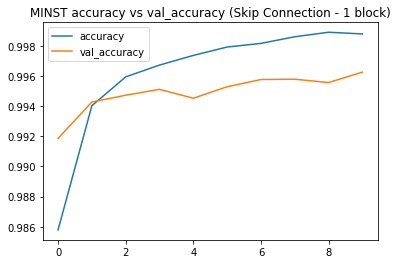

In [23]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('MINST accuracy vs val_accuracy (Skip Connection - 1 block)')


Text(0.5, 1.0, 'MINST accuracy vs val_accuracy (Skip Connection - 3 blocks)')

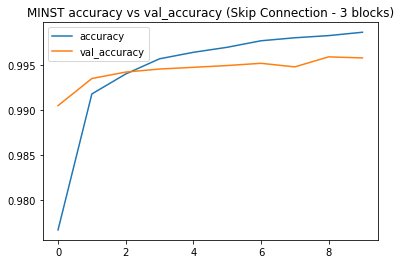

In [25]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('MINST accuracy vs val_accuracy (Skip Connection - 3 blocks)')

### Now lets create a Functional Model for CIFAR with the same baseline as MNIST.

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_123 (Dense)            (None, 64)                196672    
_________________________________________________________________
dense_124 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_125 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_126 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_127 (Dense)            (None, 10)                650       
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
_____________________________________________________

Text(0.5, 1.0, 'CIFAR-10 accuracy vs val_accuracy (Functional baseline model)')

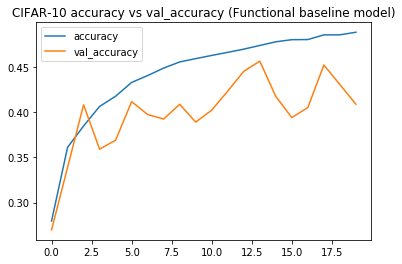

In [26]:
# Create the CIFAR baseline here.

#returns a tensor (treat any model as a layer by calling it a tensor)
inputs = Input(shape=(3072,))

#layer instance callable on a tensor, returns a tensor
output_1 = Dense(64, activation = 'relu')(inputs)
output_2 = Dense(64, activation = 'relu')(output_1)
output_3 = Dense(64, activation = 'relu')(output_2)
output_4 = Dense(64, activation = 'relu')(output_3)
predictions = Dense(10, activation = 'softmax')(output_4)

#create model that includes the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train, train_target, epochs=20, batch_size=64, validation_data=(test, test_target))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('CIFAR-10 accuracy vs val_accuracy (Functional baseline model)')


### Now lets create a ResNet for CIFAR with the same layers and compare it with MNIST.
Why does our accuracy change so much? 

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 3072)]       0                                            
__________________________________________________________________________________________________
dense_138 (Dense)               (None, 128)          393344      img[0][0]                        
__________________________________________________________________________________________________
dense_139 (Dense)               (None, 128)          16512       dense_138[0][0]                  
__________________________________________________________________________________________________
dense_140 (Dense)               (None, 128)          16512       dense_139[0][0]                  
_____________________________________________________________________________________________

Text(0.5, 1.0, 'CIFAR-10 accuracy vs val_accuracy (ResNet)')

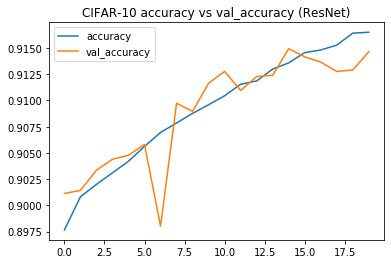

In [28]:
# Create the CIFAR ResNet here.

inputs = tf.keras.Input(shape=(3072,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = Dense(128)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(128)(block_3_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = Dense(128, activation='relu')(block_4_output)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')
model.summary()

model.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(train, train_target,
                    batch_size=128,
                    epochs=20,
                    validation_data=(test, test_target))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('CIFAR-10 accuracy vs val_accuracy (ResNet)')


### Now lets create a custom ResNet.
Change the layer widths, dropout layers, batch sizes, and skip connections to see what we could do to make the ResNet better. Use the knowledge you gained from Lab 3 to do this.

In [44]:
# Create your own ResNet here.

inputs = tf.keras.Input(shape=(3072,), name='img')
x = Dense(250, activation='relu')(inputs)
block_1_output = Dense(250, activation='relu')(x)

x = Dense(250)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = Dense(250)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(250)(block_3_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = Dense(250)(block_4_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_5_output = tf.keras.layers.add([x, block_4_output])


x = Dense(250)(block_5_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_6_output = tf.keras.layers.add([x, block_5_output])

x = Dense(250)(block_6_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_7_output = tf.keras.layers.add([x, block_6_output])

x = Dense(250)(block_7_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_8_output = tf.keras.layers.add([x, block_7_output])

x = Dense(250)(block_8_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_9_output = tf.keras.layers.add([x, block_8_output])

x = Dense(250)(block_9_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
block_10_output = tf.keras.layers.add([x, block_9_output])


x = Dense(150, activation='relu')(block_10_output)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')
model.summary()
model.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(train, train_target,
                    batch_size=128,
                    epochs=40,
                    validation_data=(test, test_target))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('CIFAR-10 accuracy vs val_accuracy (Custom ResNet)')

Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 3072)]       0                                            
__________________________________________________________________________________________________
dense_312 (Dense)               (None, 250)          768250      img[0][0]                        
__________________________________________________________________________________________________
dense_313 (Dense)               (None, 250)          62750       dense_312[0][0]                  
__________________________________________________________________________________________________
dense_314 (Dense)               (None, 250)          62750       dense_313[0][0]                  
_____________________________________________________________________________________________

50000/50000 [==============================] - 86s 2ms/sample - loss: 0.3072 - accuracy: 0.8979 - val_loss: 0.2728 - val_accuracy: 0.9009
Epoch 2/40
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.2688 - accuracy: 0.9027 - val_loss: 0.2604 - val_accuracy: 0.9043
Epoch 3/40
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.2588 - accuracy: 0.9048 - val_loss: 0.2474 - val_accuracy: 0.9074
Epoch 4/40
50000/50000 [==============================] - 75s 2ms/sample - loss: 0.2520 - accuracy: 0.9062 - val_loss: 0.2429 - val_accuracy: 0.9090
Epoch 5/40
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.2460 - accuracy: 0.9080 - val_loss: 0.2739 - val_accuracy: 0.8973
Epoch 6/40
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.2407 - accuracy: 0.9096 - val_loss: 0.2342 - val_accuracy: 0.9113
Epoch 7/40
50000/50000 [==============================] - 77s 2ms/sample - loss: 0.2364 - accuracy: 0.9106 - val_loss

KeyboardInterrupt: 